<a href="https://colab.research.google.com/github/ggfuentes78/TF_DataScience1/blob/master/ProyectoDS_ParteII_Fuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Final - Data Science I

In [254]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors, metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

url='https://raw.githubusercontent.com/ggfuentes78/TF_DataScience1/master/EPH_ingresos.csv'
df= pd.read_csv(url, sep=',')


In [255]:
df.head()

,year,quarter,region,city,weighs,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,med_care,read_write,CH10,CH11,h_ed_lvl,CH13,nationality,PP04A
0,2023,4,44,17,281,1,34,3,36.0,450000.0,4,1,1,2,0,4,1,1,1.0
1,2023,4,44,17,281,2,32,3,15.0,200000.0,4,1,1,2,0,4,1,1,2.0
2,2023,4,44,93,85,1,47,2,60.0,400000.0,2,4,1,2,0,2,1,1,2.0
3,2023,4,42,26,216,1,33,3,48.0,480000.0,4,1,1,2,0,4,1,1,2.0
4,2023,4,42,26,115,1,46,1,98.0,120000.0,3,4,1,2,0,4,2,1,2.0


##Feature selection
Elimino la caracteristicas aportan poca informacion, con Varianza baja y que empeoran la presicion en los modelos de regresion. Luego evaluo la correlacion de los campos y elimino tambien 'h_ed_lvl' porque esta altamente relacionada con 'ed_lvl'



In [256]:
df.drop(columns=['year', 'quarter', 'nationality', 'PP04A', 'read_write', 'weighs', 'med_care'], inplace=True)
df.columns

Index(['region', 'city', 'gender', 'age', 'work_class', 'hours_worked_w',
       'tot_income', 'ed_lvl', 'CH10', 'CH11', 'h_ed_lvl', 'CH13'],
      dtype='object')

In [257]:
corr_matrix = pd.DataFrame(df).corr().abs()
corr_matrix

,region,city,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,CH10,CH11,h_ed_lvl,CH13
region,1.000000,0.180238,0.012240,0.040908,0.005374,0.001984,0.070103,0.045168,0.049299,0.061443,0.052720,0.001924
city,0.180238,1.000000,0.007933,0.017871,0.012994,0.003300,0.050503,0.000836,0.009972,0.005320,0.014768,0.030570
gender,0.012240,0.007933,1.000000,0.002574,0.078189,0.292976,0.094814,0.190251,0.068495,0.063688,0.165080,0.048256
age,0.040908,0.017871,0.002574,1.000000,0.160199,0.002754,0.164908,0.066377,0.255922,0.214927,0.109655,0.127248
work_class,0.005374,0.012994,0.078189,0.160199,1.000000,0.044641,0.012282,0.054391,0.042664,0.042229,0.041951,0.017413
hours_worked_w,0.001984,0.003300,0.292976,0.002754,0.044641,1.000000,0.185165,0.042086,0.124800,0.104873,0.053694,0.043159
tot_income,0.070103,0.050503,0.094814,0.164908,0.012282,0.185165,1.000000,0.263740,0.057572,0.042376,0.258151,0.104487
ed_lvl,0.045168,0.000836,0.190251,0.066377,0.054391,0.042086,0.263740,1.000000,0.116647,0.118146,0.887447,0.221709
CH10,0.049299,0.009972,0.068495,0.255922,0.042664,0.124800,0.057572,0.116647,1.000000,0.810733,0.295508,0.403837
CH11,0.061443,0.005320,0.063688,0.214927,0.042229,0.104873,0.042376,0.118146,0.810733,1.000000,0.257751,0.347703


In [258]:
df.drop(columns=['h_ed_lvl'] ,inplace=True)
df.columns

Index(['region', 'city', 'gender', 'age', 'work_class', 'hours_worked_w',
       'tot_income', 'ed_lvl', 'CH10', 'CH11', 'CH13'],
      dtype='object')

In [259]:
df.head()

,region,city,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,CH10,CH11,CH13
0,44,17,1,34,3,36.0,450000.0,4,2,0,1
1,44,17,2,32,3,15.0,200000.0,4,2,0,1
2,44,93,1,47,2,60.0,400000.0,2,2,0,1
3,42,26,1,33,3,48.0,480000.0,4,2,0,1
4,42,26,1,46,1,98.0,120000.0,3,2,0,2


##Identificacion de Outliers
Creo un dataframe alternativo sin outliers para evaluar como performan los modelos con las distintas variantes

In [260]:
#Elimino Outliers
def remove_outliers_isolationforest(data, contamination=0.1):
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(data)
    outliers_predictions = model.predict(data)
    filtered_data = data[outliers_predictions == 1]
    return filtered_data

df_cleaned = remove_outliers_isolationforest(df)

##Clasificacion

In [261]:
seed = 1

X_gender = df_cleaned.drop(columns=["gender"])
y_gender = df_cleaned["gender"]

X_ed_lvl = df_cleaned.drop(columns=["ed_lvl"])
y_ed_lvl = df_cleaned["ed_lvl"]


X_train, X_test, y_train, y_test = train_test_split(X_ed_lvl, y_ed_lvl, test_size=0.2, random_state=seed)

X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X_gender, y_gender, test_size=0.2, random_state=seed)

<Figure size 1000x600 with 0 Axes>

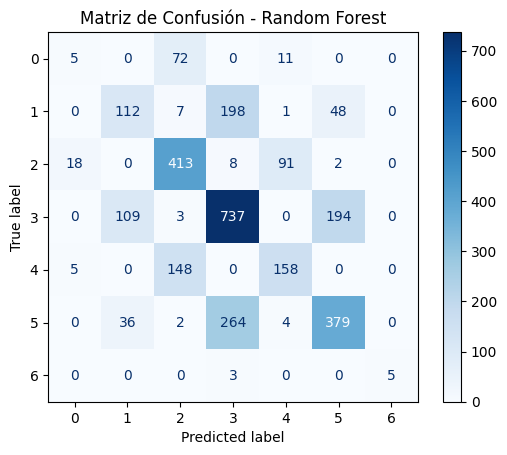

In [262]:
#RandomForest

modelo= RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
y_pred= modelo.predict(X_test)

plt.figure(figsize=(10,6))
cm=confusion_matrix(y_test, y_pred)

disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


In [263]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([  5,   0,  72,   0,  11,   0,   0,   0, 112,   7, 198,   1,  48,
         0,  18,   0, 413,   8,  91,   2,   0,   0, 109,   3, 737,   0,
       194,   0,   5,   0, 148,   0, 158,   0,   0,   0,  36,   2, 264,
         4, 379,   0,   0,   0,   0,   3,   0,   0,   5])

In [264]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.5964391691394659

In [265]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.18      0.06      0.09        88
           2       0.44      0.31      0.36       366
           3       0.64      0.78      0.70       532
           4       0.61      0.71      0.65      1043
           5       0.60      0.51      0.55       311
           6       0.61      0.55      0.58       685
           7       1.00      0.62      0.77         8

    accuracy                           0.60      3033
   macro avg       0.58      0.50      0.53      3033
weighted avg       0.58      0.60      0.58      3033



<Figure size 1000x600 with 0 Axes>

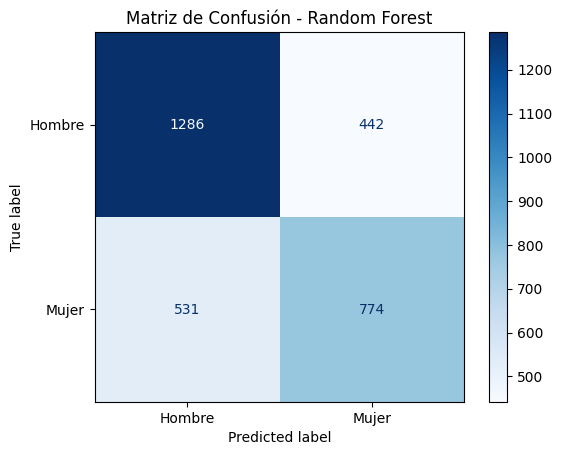

In [266]:
#RandomForest

modelo_gender= RandomForestClassifier(random_state=1)
modelo_gender.fit(X_train_gender, y_train_gender)
y_pred_gender= modelo_gender.predict(X_test_gender)

plt.figure(figsize=(10,6))
cm_gender=confusion_matrix(y_test_gender, y_pred_gender)

disp_gender= ConfusionMatrixDisplay(confusion_matrix=cm_gender, display_labels=['Hombre','Mujer'])
disp_gender.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [267]:
print(metrics.classification_report(y_test_gender, y_pred_gender))

              precision    recall  f1-score   support

           1       0.71      0.74      0.73      1728
           2       0.64      0.59      0.61      1305

    accuracy                           0.68      3033
   macro avg       0.67      0.67      0.67      3033
weighted avg       0.68      0.68      0.68      3033



##Regresion

In [268]:
#KNN con Outliers
X_tot_income= df.drop(columns=["tot_income"])
y_tot_income= df["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)

knn_params = {"n_neighbors": np.arange(5, 100, 5)}


#Busco los mejores hiperparametros para KNN
random_search = RandomizedSearchCV(KNeighborsRegressor(), knn_params)
random_search.fit(X_train_tot_income, y_train_tot_income)
print(random_search.best_score_)
print(random_search.best_params_)

y_pred_tot_income= random_search.best_estimator_.predict(X_test_tot_income)

mae = mean_absolute_error(y_test_tot_income, y_pred_tot_income)
mse = mean_squared_error(y_test_tot_income, y_pred_tot_income)
r2 = r2_score(y_test_tot_income, y_pred_tot_income)
print('Model: KNeighborsRegressor con Outliers', )
print('MAE: ', mae)
print('MSE: ', mse)
print('R2: ', r2)



0.13504245451204394
{'n_neighbors': 15}
Model: KNeighborsRegressor con Outliers
MAE:  120246.52350148368
MSE:  49243986191.43442
R2:  0.1453206188023426


In [269]:
#KNN sin Outliers
X_tot_income= df_cleaned.drop(columns=["tot_income"])
y_tot_income= df_cleaned["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)

knn_params = {"n_neighbors": np.arange(5, 100, 5)}

#Busco los mejores hiperparametros para KNN
random_search = RandomizedSearchCV(KNeighborsRegressor(), knn_params)
random_search.fit(X_train_tot_income, y_train_tot_income)
print(random_search.best_score_)
print(random_search.best_params_)

y_pred_tot_income= random_search.best_estimator_.predict(X_test_tot_income)

mae = mean_absolute_error(y_test_tot_income, y_pred_tot_income)
mse = mean_squared_error(y_test_tot_income, y_pred_tot_income)
r2 = r2_score(y_test_tot_income, y_pred_tot_income)
print('Model: KNeighborsRegressor sin Outliers', )
print('MAE: ', mae)
print('MSE: ', mse)
print('R2: ', r2)



0.16238302636095114
{'n_neighbors': 40}
Model: KNeighborsRegressor sin Outliers
MAE:  110047.18401747444
MSE:  27694044438.63138
R2:  0.17244200441533653


In [270]:
#GradientBoosting Con Outliers
X_tot_income= df.drop(columns=["tot_income"])
y_tot_income= df["tot_income"]
X_tot_income_sin_outliers= df_cleaned.drop(columns=["tot_income"])
y_tot_income_sin_outliers= df_cleaned["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)

X_train_tot_income_sin_outliers, X_test_tot_income_sin_outliers, y_train_tot_income_sin_outliers, y_test_tot_income_sin_outliers = train_test_split(X_tot_income_sin_outliers, y_tot_income_sin_outliers, test_size=0.2, random_state=1)

gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [2, 3, 4],
}


#Busco los mejores hiperparametros para GradientBoosting
random_search = RandomizedSearchCV(GradientBoostingRegressor(), gb_params)
random_search.fit(X_train_tot_income, y_train_tot_income)
print(random_search.best_score_)
print(random_search.best_params_)

y_pred_tot_income= random_search.best_estimator_.predict(X_test_tot_income)

mae = mean_absolute_error(y_test_tot_income, y_pred_tot_income)
mse = mean_squared_error(y_test_tot_income, y_pred_tot_income)
r2 = r2_score(y_test_tot_income, y_pred_tot_income)

print('Model: GradientBootingRegressor con Outliers', )
print('MAE: ', mae)
print('MSE: ', mse)
print('R2: ', r2)



0.266003305457036
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Model: GradientBootingRegressor con Outliers
MAE:  109583.57005641672
MSE:  45195067614.88681
R2:  0.21559371184705922


In [252]:
#GradientBoosting Sin Outliers
X_tot_income= df_cleaned.drop(columns=["tot_income"])
y_tot_income= df_cleaned["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)

gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [2, 3, 4],
}

#Busco los mejores hiperparametros para GradientBoosting
random_search = RandomizedSearchCV(GradientBoostingRegressor(), gb_params)
random_search.fit(X_train_tot_income, y_train_tot_income)
print(random_search.best_score_)
print(random_search.best_params_)

y_pred_tot_income= random_search.best_estimator_.predict(X_test_tot_income)

mae = mean_absolute_error(y_test_tot_income, y_pred_tot_income)
mse = mean_squared_error(y_test_tot_income, y_pred_tot_income)
r2 = r2_score(y_test_tot_income, y_pred_tot_income)

print('Model: GradientBootingRegressor Sin Outliers', )
print('MAE: ', mae)
print('MSE: ', mse)
print('R2: ', r2)



0.30856401048827903
{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Model: GradientBootingRegressor Sin Outliers
MAE:  99033.62270968812
MSE:  22955575829.644527
R2:  0.31403770355142835


#Conclusion
Se logro predecir el nivel de estudios de la poblacion (ed_lvl) con una precision del 60% entrenando y probando el modelo con RandomForest.
Se utilizo el mismo modelo para predecir el genero logrando en este caso una precision de 67% y si bien no es alto, al tratarse de un dato no critico podria utilizarse. Tanto con outliers como sin ellos los resultados fueron similares.

Por otro lado se intento predecir el nivel de ingresos (tot_income) con KNN y GradientBoosting y si bien este ultimo arrojo resultados "mejores", que mejoraron aun mas al eliminar los outliers, la precision del modelo es muy baja (R2 en 0,36) por lo que no sirve para predecir la variable objetivo.

